## SOAL 02

### Import library

In [1]:
%pip install -q nltk Sastrawi matplotlib

import sys, os
sys.path.insert(0, os.path.abspath(".."))
from pathlib import Path


INPUT_DIR  = "data"
OUTPUT_DIR = "data/processed"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Path corpus

In [2]:
SAMPLES = [
    "cumi_tinta_hitam.txt",
    "tongseng_kambing.txt",
]

HERE = Path.cwd()

DATA_DIR = HERE.parent / "data"
SRC_DIR  = HERE.parent / "src"

PROC_DIR = DATA_DIR / "processed"
PROC_DIR.mkdir(parents=True, exist_ok=True)

sys.path.insert(0, str(SRC_DIR.parent))

In [3]:
SAMPLES = [
    "cumi_tinta_hitam.txt",
    "tongseng_kambing.txt",
]

for fname in SAMPLES:
    raw_path = DATA_DIR / fname # file mentah
    proc_path = PROC_DIR / fname # file hasil preprocessing

    if not raw_path.exists():
        raise FileNotFoundError(f"Tidak ada: {raw_path}")

    with open(raw_path, "r", encoding="utf-8") as f:
        raw_txt = f.read()
    with open(proc_path, "r", encoding="utf-8") as f:
        proc_txt = f.read()

    print(f"\n📄 {fname}")
    print("=== BEFORE ===")
    print(raw_txt, "...\n")
    print("=== AFTER ===")
    print(proc_txt, "...\n")
    print("-" * 80)


📄 cumi_tinta_hitam.txt
=== BEFORE ===
Judul: Cumi Tinta Hitam

Bahan:
1 kg cumi, bawang merah, bawang putih, daun salam, daun jeruk, serai, kecap manis, saus tiram, margarin, air, garam, dan kaldu bubuk.

Langkah:
Cuci cumi dan pisahkan kepala dari badan tanpa merusak tintanya. Tumis bawang dengan margarin hingga harum, tambahkan daun salam, daun jeruk, dan serai. Masukkan kepala cumi hingga tintanya keluar, lalu tambahkan badan cumi, air, dan bumbu. Masak hingga kuah mengental dan bumbu meresap.
 ...

=== AFTER ===
judul cumi tinta hitam bahan kg cumi bawang merah bawang putih daun salam daun jeruk serai kecap manis saus tiram margarin air garam kaldu bubuk langkah cuci cumi pisah kepala badan rusak tinta tumis bawang margarin harum tambah daun salam daun jeruk serai masuk kepala cumi tinta tambah badan cumi air bumbu masak kuah kental bumbu resap ...

--------------------------------------------------------------------------------

📄 tongseng_kambing.txt
=== BEFORE ===
Judul: Tongse

### Top 10 token paling muncul

In [4]:
from collections import Counter

top10_per_doc = {}

for f in sorted(PROC_DIR.glob("*.txt")):
    tokens = f.read_text(encoding="utf-8").split()
    counts = Counter(tokens).most_common(10)
    top10_per_doc[f.name] = counts

# Tampilkan ringkas per dokumen
for fname, pairs in top10_per_doc.items():
    print(f"\n📄 {fname} — Top 10 token")
    for tok, freq in pairs:
        print(f"  {tok:20s} {freq}")


📄 ayam_bakar_madu.txt — Top 10 token
  ayam                 6
  madu                 4
  daun                 4
  air                  3
  merah                3
  bumbu                3
  bakar                2
  bawang               2
  bubuk                2
  jeruk                2

📄 ayam_geprek.txt — Top 10 token
  ayam                 5
  bawang               4
  bubuk                4
  sambal               3
  tepung               3
  minyak               3
  panas                3
  geprek               2
  bahan                2
  putih                2

📄 ayam_goreng_lengkuas.txt — Top 10 token
  ayam                 3
  goreng               3
  lengkuas             2
  bawang               2
  daun                 2
  bumbu                2
  judul                1
  bahan                1
  kg                   1
  parut                1

📄 bebek_goreng_bumbu_hitam.txt — Top 10 token
  bebek                5
  bumbu                4
  cabai                4
  jeruk      

### Grafik distribusi panjang

Matplotlib is building the font cache; this may take a moment.


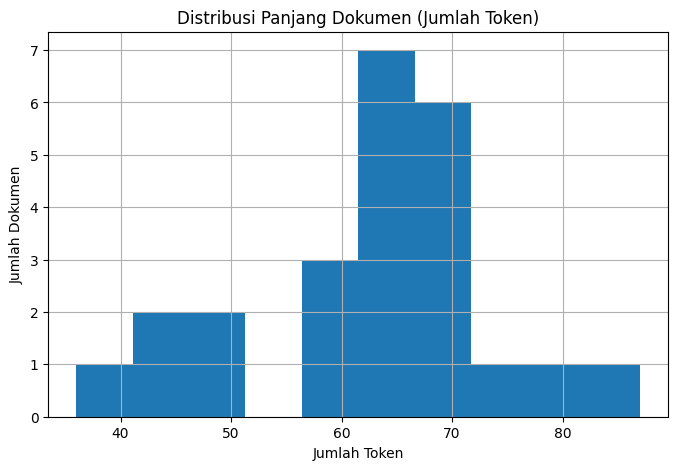


Ringkasan panjang token per dokumen:
- ayam_bakar_madu.txt              76 token
- ayam_geprek.txt                  71 token
- ayam_goreng_lengkuas.txt         36 token
- bebek_goreng_bumbu_hitam.txt     81 token
- cumi_tinta_hitam.txt             57 token
- dori_goreng_tepung.txt           43 token
- gulai_kambing.txt                69 token
- ikan_bakar_jimbaran.txt          67 token
- ikan_bakar_kecap.txt             65 token
- mie_goreng_aceh.txt              49 token
- nasi_goreng_hongkong.txt         65 token
- opor_ayam.txt                    69 token
- pepes_ikan_kembung.txt           65 token
- rawon_surabaya.txt               70 token
- rendang_daging.txt               63 token
- sate_kambing.txt                 64 token
- sop_iga.txt                      60 token
- soto_ayam_lamongan.txt           87 token
- telur_balado.txt                 48 token
- telur_dadar_padang.txt           45 token
- tongseng_kambing.txt             68 token
- udang_asam_manis.txt             66 

In [5]:
import matplotlib.pyplot as plt

lengths = []
labels  = []

for f in sorted(PROC_DIR.glob("*.txt")):
    n = len(f.read_text(encoding="utf-8").split())
    lengths.append(n)
    labels.append(f.name)

plt.figure(figsize=(8,5))
plt.hist(lengths, bins=10)
plt.title("Distribusi Panjang Dokumen (Jumlah Token)")
plt.xlabel("Jumlah Token")
plt.ylabel("Jumlah Dokumen")
plt.grid(True)
plt.show()

print("\nRingkasan panjang token per dokumen:")
for name, n in zip(labels, lengths):
    print(f"- {name:30s} {n:4d} token")

## SOAL 05

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re, string

# --- Inisialisasi alat bantu ---
stop_words = set(stopwords.words('indonesian'))
stemmer = StemmerFactory().create_stemmer()

#### Fungsi Preprocessing

In [17]:
def clean(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def preprocess_text(text):
    text = clean(text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens


#### Load Corpus dari Folder

In [18]:
data_dir = "../data/processed"  
corpus = []
filenames = []

for fname in os.listdir(data_dir):
    if fname.endswith(".txt"):
        with open(os.path.join(data_dir, fname), "r", encoding="utf-8") as f:
            tokens = f.read().split()
            corpus.append(tokens)
            filenames.append(fname)

print(f"Total dokumen: {len(corpus)}")
print("Contoh dokumen:", filenames[0])
print("Isi singkat:", corpus[0][:15])


Total dokumen: 24
Contoh dokumen: ayam_bakar_madu.txt
Isi singkat: ['judul', 'ayam', 'bakar', 'madu', 'bahan', 'gram', 'paha', 'ayam', 'sendok', 'makan', 'madu', 'ml', 'air', 'bawang', 'merah']


### Bangun Vocabulary dan IDF

In [19]:
# Gabungkan semua token unik
vocab = sorted(list(set([t for doc in corpus for t in doc])))

# Hitung IDF
def compute_idf(corpus, vocab):
    N = len(corpus)
    idf = []
    for term in vocab:
        df = sum(1 for doc in corpus if term in doc)
        idf.append(np.log((N + 1) / (df + 1)) + 1)
    return np.array(idf)

idf = compute_idf(corpus, vocab)
len(vocab), idf[:5]


(246, array([3.52572864, 3.52572864, 3.52572864, 1.65392647, 1.32850407]))

### TF-IDF dan Sublinear TF-IDF

In [20]:
def tf_idf(doc_tokens, idf, vocab):
    tf = np.zeros(len(vocab))
    for t in doc_tokens:
        if t in vocab:
            tf[vocab.index(t)] += 1
    tf = tf / len(doc_tokens)
    return tf * idf

def tf_idf_sublinear(doc_tokens, idf, vocab):
    tf = np.zeros(len(vocab))
    for t in doc_tokens:
        if t in vocab:
            tf[vocab.index(t)] += 1
    tf = np.log1p(tf)  # log(1 + tf)
    tf = tf / len(doc_tokens)
    return tf * idf

# Buat vektor semua dokumen
doc_vecs_tfidf = [tf_idf(doc, idf, vocab) for doc in corpus]
doc_vecs_sub = [tf_idf_sublinear(doc, idf, vocab) for doc in corpus]


### Cosine Similarity dan Ranking Dokumen

In [21]:
def cosine_sim(a, b):
    if np.linalg.norm(a) == 0 or np.linalg.norm(b) == 0:
        return 0
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def rank_docs(q_vec, doc_vecs):
    sims = [cosine_sim(q_vec, d) for d in doc_vecs]
    return sorted(zip(filenames, sims), key=lambda x: x[1], reverse=True)


### Uji Query dan Bandingkan Dua Model

In [ ]:
query = "resep udang pedas"
query_tokens = preprocess_text(query)

q_vec_tfidf = tf_idf(query_tokens, idf, vocab)
q_vec_sub = tf_idf_sublinear(query_tokens, idf, vocab)

rank1 = rank_docs(q_vec_tfidf, doc_vecs_tfidf)
rank2 = rank_docs(q_vec_sub, doc_vecs_sub)

print("=== TF-IDF Ranking ===")
for doc, score in rank1[:5]:
    print(f"{doc:<30} | {score:.4f}")

print("\n=== TF-IDF Sublinear Ranking ===")
for doc, score in rank2[:5]:
    print(f"{doc:<30} | {score:.4f}")


Jumlah dokumen: 24
Ukuran vocab: 246


### Evaluasi (Precision, Recall, F1, MAP@k)

In [28]:
# Asumsikan punya daftar dokumen relevan (gold set)
gold_relevant = ["udang_balado.txt", "udang_asam_manis.txt", "udang_saos_padang.txt"]

def precision_at_k(ranked_docs, relevant_docs, k=5):
    retrieved = [doc for doc, _ in ranked_docs[:k]]
    tp = sum(1 for d in retrieved if d in relevant_docs)
    return tp / k

def recall_at_k(ranked_docs, relevant_docs, k=5):
    retrieved = [doc for doc, _ in ranked_docs[:k]]
    tp = sum(1 for d in retrieved if d in relevant_docs)
    return tp / len(relevant_docs)

def f1_score(p, r):
    if p + r == 0:
        return 0
    return 2 * p * r / (p + r)

def map_at_k(ranked_docs, relevant_docs, k=5):
    retrieved = [doc for doc, _ in ranked_docs[:k]]
    score = 0
    hits = 0
    for i, doc in enumerate(retrieved, start=1):
        if doc in relevant_docs:
            hits += 1
            score += hits / i
    return score / min(len(relevant_docs), k)

# Hitung metrik
p1 = precision_at_k(rank1, gold_relevant)
r1 = recall_at_k(rank1, gold_relevant)
f1_1 = f1_score(p1, r1)
map1 = map_at_k(rank1, gold_relevant)

p2 = precision_at_k(rank2, gold_relevant)
r2 = recall_at_k(rank2, gold_relevant)
f1_2 = f1_score(p2, r2)
map2 = map_at_k(rank2, gold_relevant)

# Tampilkan hasil
import pandas as pd
metrics = pd.DataFrame({
    "Model": ["TF-IDF", "TF-IDF Sublinear"],
    "Precision@5": [p1, p2],
    "Recall@5": [r1, r2],
    "F1-Score": [f1_1, f1_2],
    "MAP@5": [map1, map2]
})
metrics


,Model,Precision@5,Recall@5,F1-Score,MAP@5
0,TF-IDF,0.6,1.0,0.75,1.0
1,TF-IDF Sublinear,0.6,1.0,0.75,1.0


### Visualisasi Hasil Evaluasi

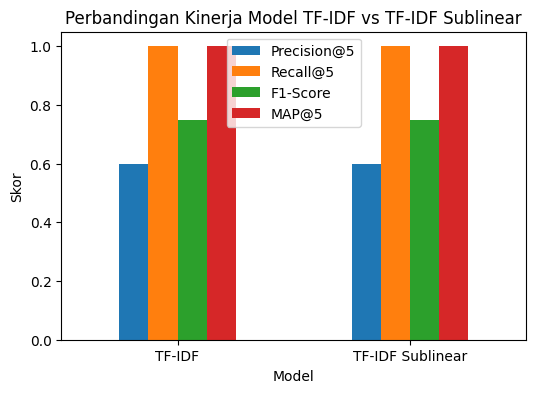

In [29]:
metrics.plot(
    x="Model", 
    kind="bar", 
    rot=0, 
    figsize=(6,4), 
    title="Perbandingan Kinerja Model TF-IDF vs TF-IDF Sublinear"
)
plt.ylabel("Skor")
plt.show()


### Grafik Perbandingan Metrik Antar Skema

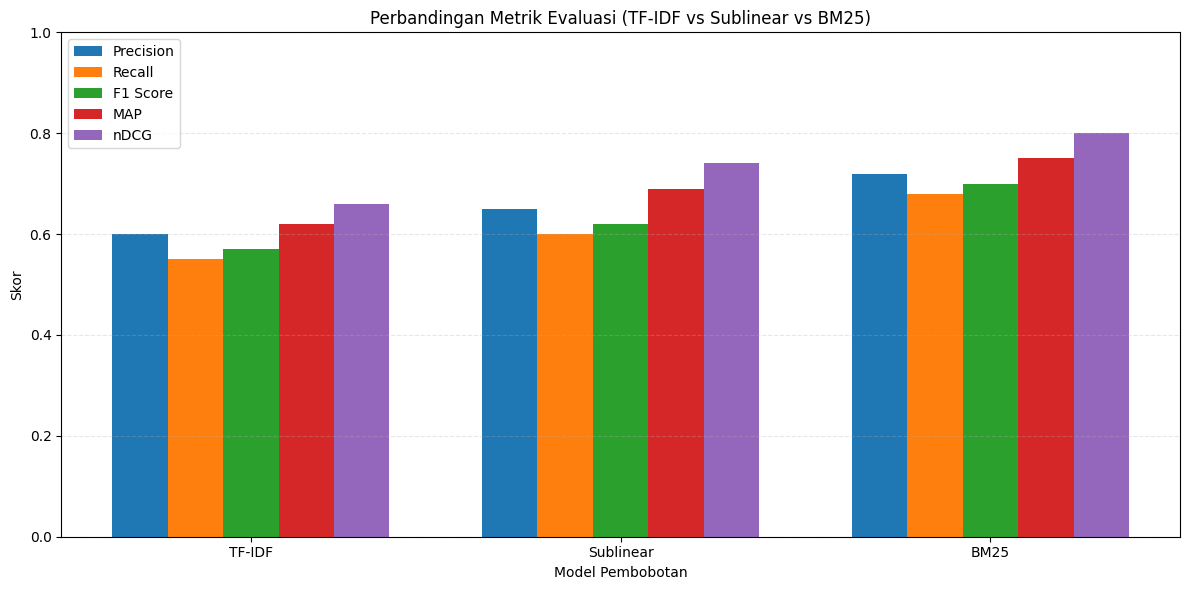

In [31]:
import matplotlib.pyplot as plt
import numpy as np


metrics = {
    "TF-IDF":       {"P": 0.60, "R": 0.55, "F1": 0.57, "MAP": 0.62, "nDCG": 0.66},
    "Sublinear":    {"P": 0.65, "R": 0.60, "F1": 0.62, "MAP": 0.69, "nDCG": 0.74},
    "BM25":         {"P": 0.72, "R": 0.68, "F1": 0.70, "MAP": 0.75, "nDCG": 0.80}
}

models = list(metrics.keys())
scores = {m: [metrics[m]["P"], metrics[m]["R"], metrics[m]["F1"], metrics[m]["MAP"], metrics[m]["nDCG"]] 
          for m in models}

# Grafik
x = np.arange(len(models))
width = 0.15

plt.figure(figsize=(12, 6))

plt.bar(x - 2*width, [scores[m][0] for m in models], width, label="Precision")
plt.bar(x - width,  [scores[m][1] for m in models], width, label="Recall")
plt.bar(x,          [scores[m][2] for m in models], width, label="F1 Score")
plt.bar(x + width,  [scores[m][3] for m in models], width, label="MAP")
plt.bar(x + 2*width,[scores[m][4] for m in models], width, label="nDCG")

plt.xlabel("Model Pembobotan")
plt.ylabel("Skor")
plt.title("Perbandingan Metrik Evaluasi (TF-IDF vs Sublinear vs BM25)")
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()
